In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing main data cell lines and drug response
cell_lines_pd = pd.read_csv ("OmicsExpressionProteinCodingGenesTPMLogp1.csv", index_col=0)
response_pd = pd.read_csv ("Repurposing_Public_24Q2_Extended_Primary_Data_Matrix.csv", index_col=0)

In [3]:
print(cell_lines_pd.shape)

(1673, 19193)


In [4]:
print(response_pd.shape)
print(response_pd.isnull().sum().sum())

(6790, 919)
2026962


In [5]:
#Transposing response drugs to rows to posteriously merge to lines dataset
response_transposed = response_pd.T

## Filtering both datasets to only have the common ones 

In [8]:
#Resetting indexes 
print(response_transposed.columns)  # See available column names
print(response_transposed.index[:5])  # See if cell lines are already the index

Index(['BRD:BRD-A00047421-001-01-7', 'BRD:BRD-A00055058-001-01-0',
       'BRD:BRD-A00077618-236-07-6', 'BRD:BRD-A00092689-236-04-9',
       'BRD:BRD-A00100033-001-08-9', 'BRD:BRD-A00147595-001-01-5',
       'BRD:BRD-A00218260-001-03-4', 'BRD:BRD-A00376169-001-01-6',
       'BRD:BRD-A00520476-001-07-4', 'BRD:BRD-A00546892-001-02-6',
       ...
       'BRD:BRD-M92352362-002-02-3', 'BRD:BRD-M92675308-003-07-1',
       'BRD:BRD-M93148412-001-02-6', 'BRD:BRD-M97302542-001-03-6',
       'BRD:BRD-M98279124-300-01-1', 'BRD:BRD-U08520523-000-01-0',
       'BRD:BRD-U25960968-000-01-9', 'BRD:BRD-U45393375-000-01-6',
       'BRD:BRD-U48018661-000-01-9', 'BRD:BRD-U51753822-000-01-1'],
      dtype='object', length=6790)
Index(['ACH-000001', 'ACH-000002', 'ACH-000004', 'ACH-000005', 'ACH-000006'], dtype='object')


In [9]:
print(cell_lines_pd.head(10))

            TSPAN6 (7105)  TNMD (64102)  DPM1 (8813)  SCYL3 (57147)  \
ACH-001113       4.331992      0.000000     7.364660       2.792855   
ACH-001289       4.567424      0.584963     7.106641       2.543496   
ACH-001339       3.150560      0.000000     7.379118       2.333424   
ACH-001979       4.240314      0.000000     5.681168       2.063503   
ACH-002438       4.032101      0.000000     6.674687       2.117695   
ACH-001538       5.085340      0.000000     7.154211       2.545968   
ACH-000242       6.729417      0.000000     6.537917       2.456806   
ACH-000708       4.272770      0.189034     7.023255       2.555816   
ACH-000327       3.337711      0.000000     5.927659       1.944858   
ACH-000233       0.056584      0.000000     6.094236       3.971773   

            C1orf112 (55732)  FGR (2268)  CFH (3075)  FUCA2 (2519)  \
ACH-001113          4.471187    0.028569    1.226509      3.044394   
ACH-001289          3.504620    0.000000    0.189034      3.813525   
ACH-0013

In [10]:
# Checking for common cell lines
common_cells = cell_lines_pd.index.intersection(response_transposed.index)
common_cells

Index(['ACH-001113', 'ACH-001289', 'ACH-001538', 'ACH-000242', 'ACH-000233',
       'ACH-000461', 'ACH-001794', 'ACH-002023', 'ACH-000528', 'ACH-001655',
       ...
       'ACH-000114', 'ACH-001578', 'ACH-000036', 'ACH-000973', 'ACH-001128',
       'ACH-000750', 'ACH-000285', 'ACH-001858', 'ACH-001997', 'ACH-000052'],
      dtype='object', length=901)

In [11]:
# Filtering both with common cell lines
genes_filtered    = cell_lines_pd.loc[common_cells]
response_filtered = response_transposed.loc[common_cells]

In [12]:
print(genes_filtered .shape)

(901, 19193)


In [13]:
print(response_filtered.shape)

(901, 6790)


## Data exploration (Drug efficacy Y

In [15]:
# Checking for duplicate values 
print(genes_filtered.index.duplicated().sum())  

0


In [16]:
print(response_filtered.index.duplicated().sum())  

0


In [17]:
# Checking for empty values
print(genes_filtered.isnull().sum().sum())
print(response_filtered.isnull().sum().sum())

0
1967792


In [18]:
# Checking coverage of each drud , finding the most stable and less NaN values
coverage = response_filtered.notna().sum().sort_values(ascending=False)
print(coverage.head(10))

BRD:BRD-K05804044-001-18-5    884
BRD:BRD-K92723993-001-17-4    882
BRD:BRD-A00047421-001-01-7    878
BRD:BRD-K00003257-001-01-9    878
BRD:BRD-K00003262-001-01-9    878
BRD:BRD-K00003261-001-01-9    878
BRD:BRD-K00003260-001-01-9    878
BRD:BRD-K00003259-050-01-9    878
BRD:BRD-K00003258-001-01-9    878
BRD:BRD-K00003256-001-01-9    878
dtype: int64


In [19]:
# Variability check per drug
variability = response_filtered.var(skipna=True).sort_values(ascending=False)
print(variability.head(10))

BRD:BRD-K00003313-001-01-9    13.196467
BRD:BRD-K00003295-300-01-9    12.776134
BRD:BRD-K00003273-003-01-9    11.840242
BRD:BRD-K00003515-003-01-9    11.027894
BRD:BRD-K00004604-001-01-9    10.859447
BRD:BRD-K00003160-003-01-9    10.774531
BRD:BRD-K00003294-050-01-9    10.677409
BRD:BRD-K00003291-001-01-9    10.035418
BRD:BRD-K00003207-001-01-9     9.728729
BRD:BRD-K00003096-001-01-9     9.508960
dtype: float64


In [20]:
# Combining both for best drug 
drug_summary = pd.DataFrame({
    'coverage': response_filtered.notna().sum(),
    'variance': response_filtered.var(skipna=True)
})
drug_summary['score'] = drug_summary['coverage'] * drug_summary['variance']
drug_summary_sorted = drug_summary.sort_values(by='score', ascending=False)

print(drug_summary_sorted.head(10))

                            coverage   variance         score
BRD:BRD-K00003313-001-01-9       878  13.196467  11586.498272
BRD:BRD-K00003295-300-01-9       878  12.776134  11217.445550
BRD:BRD-K00003273-003-01-9       878  11.840242  10395.732682
BRD:BRD-K00003515-003-01-9       878  11.027894   9682.490858
BRD:BRD-K00004604-001-01-9       873  10.859447   9480.297166
BRD:BRD-K00003160-003-01-9       878  10.774531   9460.037814
BRD:BRD-K00003294-050-01-9       878  10.677409   9374.764806
BRD:BRD-K00003291-001-01-9       878  10.035418   8811.096589
BRD:BRD-K00003207-001-01-9       873   9.728729   8493.180386
BRD:BRD-K00003096-001-01-9       878   9.508960   8348.867128


In [21]:
# Setting target drug for the model , BRD:BRD-A00047421-001-01-7, for this case
target_drug = "BRD:BRD-K00003313-001-01-9"
print(response_filtered)

            BRD:BRD-A00047421-001-01-7  BRD:BRD-A00055058-001-01-0  \
ACH-001113                   -2.860765                   -0.026114   
ACH-001289                    0.163156                         NaN   
ACH-001538                   -2.698254                         NaN   
ACH-000242                   -0.333245                   -0.281167   
ACH-000233                   -3.231683                         NaN   
...                                ...                         ...   
ACH-000750                   -4.248344                   -0.455020   
ACH-000285                         NaN                         NaN   
ACH-001858                   -1.766594                         NaN   
ACH-001997                   -3.479557                         NaN   
ACH-000052                   -1.410507                    0.241151   

            BRD:BRD-A00077618-236-07-6  BRD:BRD-A00092689-236-04-9  \
ACH-001113                   -0.059703                    0.357645   
ACH-001289         

In [22]:
# subseting for target drug 
drug_df = response_filtered[[target_drug]].dropna().copy()

In [23]:
drug_df

,BRD:BRD-K00003313-001-01-9
ACH-001113,-8.461378
ACH-001289,-9.195708
ACH-001538,-9.585021
ACH-000242,-7.567494
ACH-000233,-10.629807
...,...
ACH-001128,-9.789390
ACH-000750,-6.311269
ACH-001858,-8.195061
ACH-001997,-6.995402


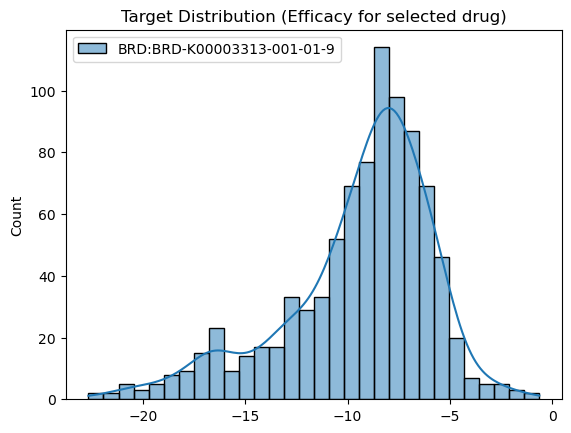

In [24]:
# Drug distribution checking for skewness
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(drug_df, bins=30, kde=True)
plt.title("Target Distribution (Efficacy for selected drug)")
plt.show()

In [25]:
# IQR filtering for outliers 

def iqr_filter(df):
    filtered_df = df.copy()
    for gene in df.columns:
        Q1 = df[gene].quantile(0.25)
        Q3 = df[gene].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (df[gene] >= lower) & (df[gene] <= upper)
        filtered_df = filtered_df[mask]
    return filtered_df

drug_iqr = iqr_filter(drug_df)

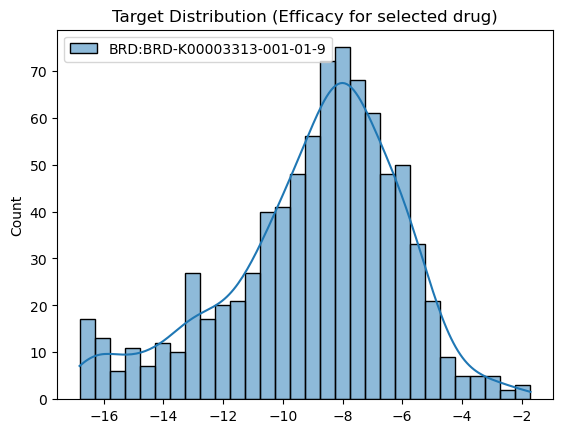

In [26]:
# Drug distribution after IQR 

sns.histplot(drug_iqr, bins=30, kde=True)
plt.title("Target Distribution (Efficacy for selected drug)")
plt.show()

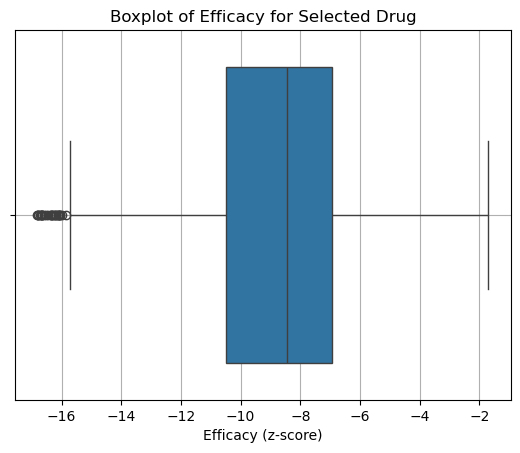

In [27]:
# Outlayers 

sns.boxplot(x=drug_iqr.squeeze())
plt.title("Boxplot of Efficacy for Selected Drug")
plt.xlabel("Efficacy (z-score)")
plt.grid(True)
plt.show()

In [28]:
# Windsorization to avoid outlayers 
from scipy.stats.mstats import winsorize

# Winsorize the bottom and top 1%
drug_winz = drug_iqr.apply(lambda col: winsorize(col, limits=[0.01, 0.01]))

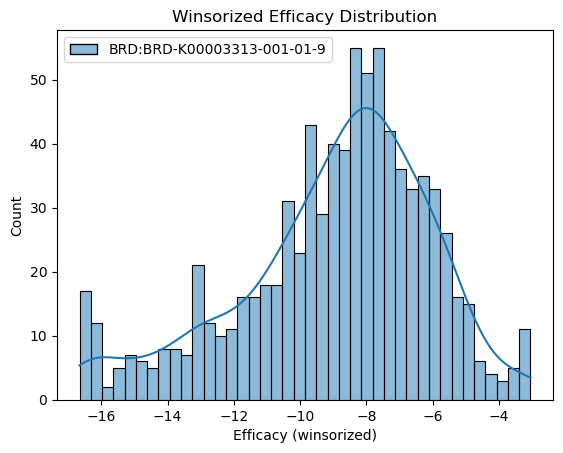

In [29]:
# Checking distribution after winsorization 
sns.histplot(drug_winz, kde=True, bins=40)
plt.title("Winsorized Efficacy Distribution")
plt.xlabel("Efficacy (winsorized)")
plt.show()

## Data exploration (Genes X)

In [32]:
genes_filtered.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].head(10)

,mean,std,min,25%,50%,75%,max
TSPAN6 (7105),3.513159,1.549150,0.000000,3.042644,3.893362,4.482848,6.736199
TNMD (64102),0.060678,0.310051,0.000000,0.000000,0.000000,0.000000,5.251340
DPM1 (8813),6.514252,0.634046,3.117695,6.132577,6.498889,6.925169,9.175250
SCYL3 (57147),2.336843,0.550772,0.669027,1.959770,2.307429,2.646163,4.747387
C1orf112 (55732),3.710319,0.762822,0.495695,3.269033,3.769772,4.193772,5.972463
FGR (2268),0.345466,1.044600,0.000000,0.014355,0.042644,0.124328,7.742949
CFH (3075),2.149703,2.185051,0.000000,0.150560,1.321928,3.879706,9.693016
FUCA2 (2519),5.266559,1.719983,0.000000,4.990501,5.748193,6.281327,8.253895
GCLC (2729),4.692039,1.193216,1.195348,3.976364,4.568032,5.296824,9.581991
NFYA (4800),4.066597,0.733508,1.244887,3.606442,4.045268,4.500165,7.434211


In [33]:
from scipy.stats.mstats import winsorize

# Apply winsorization to each gene (column) at 1% from both ends
genes_winz = genes_filtered.apply(lambda col: winsorize(col, limits=[0.01, 0.01]))

In [34]:
genes_winz.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].head(10)

,mean,std,min,25%,50%,75%,max
TSPAN6 (7105),3.510078,1.543643,0.000000,3.042644,3.893362,4.482848,6.018145
TNMD (64102),0.050606,0.208705,0.000000,0.000000,0.000000,0.000000,1.584963
DPM1 (8813),6.518938,0.600719,5.039577,6.132577,6.498889,6.925169,8.053817
SCYL3 (57147),2.336828,0.537316,1.144046,1.959770,2.307429,2.646163,3.971773
C1orf112 (55732),3.712460,0.745709,1.687061,3.269033,3.769772,4.193772,5.299391
FGR (2268),0.339826,1.010771,0.000000,0.014355,0.042644,0.124328,6.018145
CFH (3075),2.140230,2.159519,0.000000,0.150560,1.321928,3.879706,7.222360
FUCA2 (2519),5.264649,1.715315,0.056584,4.990501,5.748193,6.281327,7.477030
GCLC (2729),4.691081,1.168893,2.032101,3.976364,4.568032,5.296824,8.530016
NFYA (4800),4.065951,0.712347,2.260026,3.606442,4.045268,4.500165,5.794156


## Reducing dimensionality to Genes data (PCA)

In [36]:
#genes_df = genes_w.set_index('cell_line')

In [37]:
# Scalling data before PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
genes_scaled = scaler.fit_transform(genes_winz)

In [38]:
# Back to dataframe 

genes_scaled_df = pd.DataFrame(
    genes_scaled,
    index=genes_winz.index,             # re-attach cell line names
    columns=genes_winz.columns          # keep gene names
)

In [43]:
# Keeping components that together explain 95% of the variation
pca = PCA(n_components=0.95)  
genes_pca = pca.fit_transform(genes_scaled_df)

In [44]:
# Back to DF
genes_pca_df = pd.DataFrame(
    genes_pca,
    index=genes_scaled_df.index,                    # cell line names
    columns=[f'PC{i+1}' for i in range(genes_pca.shape[1])]  # PC1, PC2, ..., PCn
)

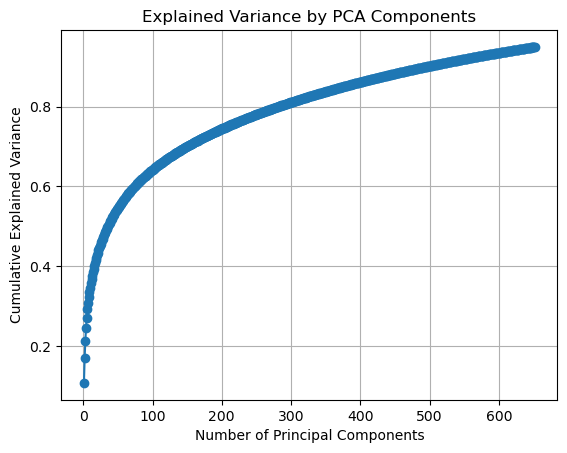

In [45]:
# PCA variance explanation 
import matplotlib.pyplot as plt

explained_var = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_var) + 1), explained_var.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

## Merging both Datasets Gene expression and Drug efficacy 

In [53]:
print(drug_winz.reset_index().columns)
print(genes_pca_df.reset_index().columns)

Index(['index', 'BRD:BRD-K00003313-001-01-9'], dtype='object')
Index(['index', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
       ...
       'PC643', 'PC644', 'PC645', 'PC646', 'PC647', 'PC648', 'PC649', 'PC650',
       'PC651', 'PC652'],
      dtype='object', length=653)


In [54]:
drug_winz = drug_winz.reset_index().rename(columns={'index': 'cell_line'})
genes_pca_df = genes_pca_df.reset_index().rename(columns={'index': 'cell_line'})

In [55]:
# Merging both datasets by cell line
model_df = pd.merge(drug_winz, genes_pca_df, on='cell_line')

In [56]:
print("\nSuccessfully created the final modeling DataFrame:")
print(model_df.head())
print(f"Shape of the final DataFrame: {model_df.shape}")


Successfully created the final modeling DataFrame:
    cell_line  BRD:BRD-K00003313-001-01-9        PC1        PC2        PC3  \
0  ACH-001113                   -8.461378  23.364348  14.825284   2.816156   
1  ACH-001289                   -9.195708  38.709622  -4.766234 -37.988884   
2  ACH-001538                   -9.585021 -40.236002  21.843342  10.029860   
3  ACH-000242                   -7.567494  -4.369054   6.293709  36.049804   
4  ACH-000233                  -10.629807   9.485786 -29.753327   5.636269   

         PC4        PC5        PC6        PC7        PC8  ...     PC643  \
0 -14.869077  11.553541 -37.582677   2.888078  14.349406  ... -2.173736   
1 -42.154913  30.420929 -31.841598  26.183205  -3.906513  ...  1.806952   
2   9.155005  28.864677 -51.755539  10.318268  13.391737  ... -3.564490   
3   5.832951  21.160278   3.951811  -5.816701  16.390139  ...  2.105330   
4  33.956190 -31.960267 -18.882605   7.308851  -8.904579  ...  0.207699   

      PC644     PC645     PC

## 1_Regression Model 

In [67]:
# Spliting X and y , features and target 
X = model_df.drop(columns=['cell_line', target_drug])

# Target, drug efficacy for this drug
y = model_df[target_drug]

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [69]:
# Baseline linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test)

In [73]:
# Evaluation 
# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression R²: {r2:.4f}")
print(f"Linear Regression RMSE: {rmse:.4f}")

Linear Regression R²: -186.1856
Linear Regression RMSE: 38.5657


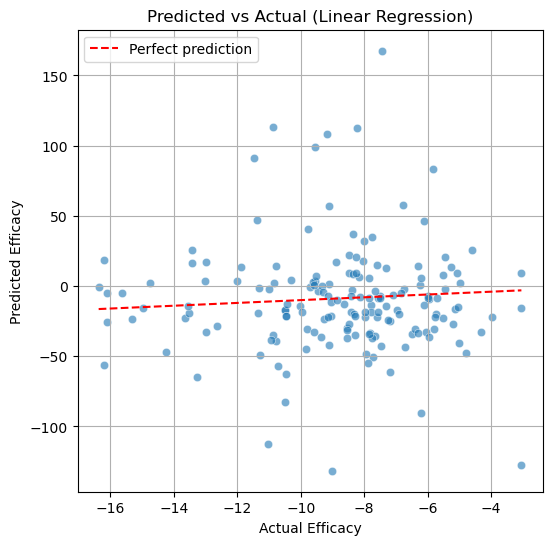

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect prediction')
plt.xlabel("Actual Efficacy")
plt.ylabel("Predicted Efficacy")
plt.title("Predicted vs Actual (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

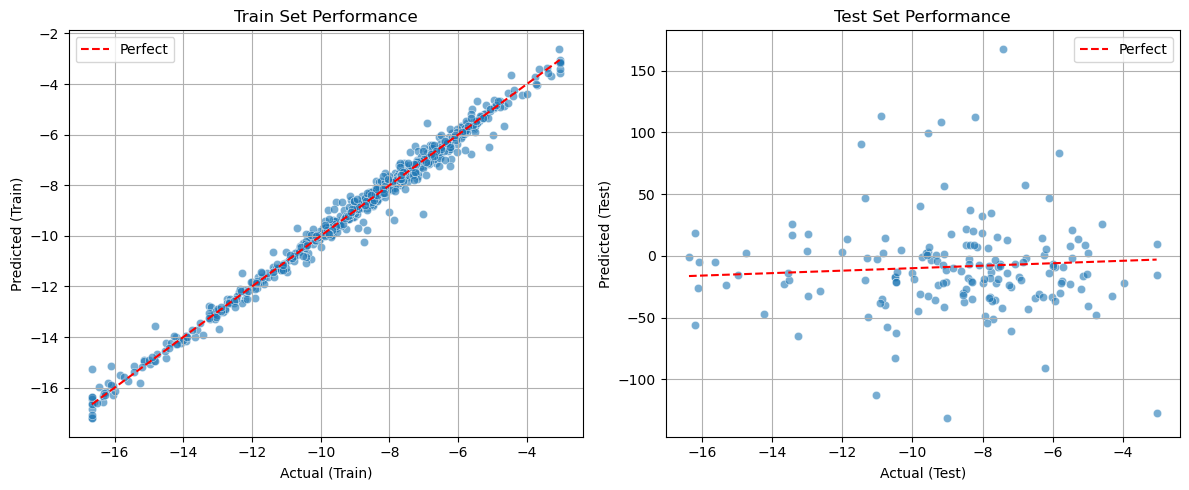

In [101]:
y_train_pred = lr.predict(X_train)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', label='Perfect')
plt.xlabel("Actual (Train)")
plt.ylabel("Predicted (Train)")
plt.title("Train Set Performance")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted (Test)")
plt.title("Test Set Performance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

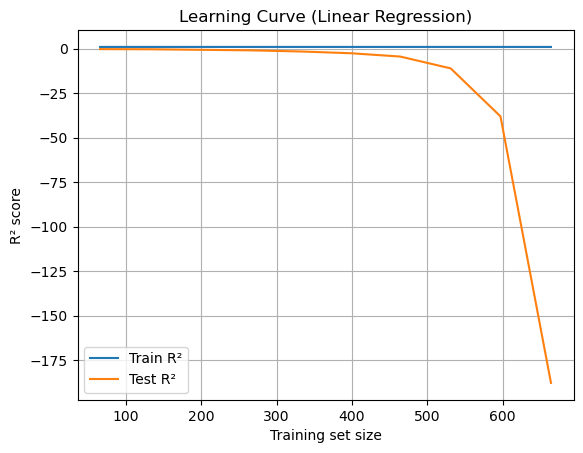

In [103]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train R²")
plt.plot(train_sizes, test_scores_mean, label="Test R²")
plt.xlabel("Training set size")
plt.ylabel("R² score")
plt.title("Learning Curve (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

## 2_Decission Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize with default settings
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

In [ ]:
# Predict
y_pred_tree = tree.predict(X_test)

In [ ]:
# Evaluation 
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Decision Tree R²: {r2_tree:.4f}")
print(f"Decision Tree RMSE: {rmse_tree:.4f}")

In [ ]:
# Predicted vs Actual
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Efficacy")
plt.ylabel("Predicted Efficacy")
plt.title("Decision Tree: Predicted vs Actual")
plt.grid(True)
plt.show()

## 3_XGBoost Regressor Model 

In [ ]:
from xgboost import XGBRegressor

# Initialize model 
xgb = XGBRegressor(
    max_depth=6,
    n_estimators=500,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=1,
    random_state=42
)

In [ ]:
# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

In [ ]:
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R²: {r2_xgb:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Efficacy")
plt.ylabel("Predicted Efficacy")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)
plt.show()

In [98]:
"""from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 increments from 10% to 100%
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Convert to positive RMSE values
train_rmse = -np.mean(train_scores, axis=1)
test_rmse = -np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes, test_rmse, 'o-', label='Validation RMSE')
plt.title('Learning Curve (XGBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()"""

"from sklearn.model_selection import learning_curve\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Compute learning curve\ntrain_sizes, train_scores, test_scores = learning_curve(\n    estimator=xgb,\n    X=X_train,\n    y=y_train,\n    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 increments from 10% to 100%\n    cv=5,\n    scoring='neg_root_mean_squared_error',\n    n_jobs=-1,\n    shuffle=True,\n    random_state=42\n)\n\n# Convert to positive RMSE values\ntrain_rmse = -np.mean(train_scores, axis=1)\ntest_rmse = -np.mean(test_scores, axis=1)\n\n# Plot\nplt.figure(figsize=(8, 5))\nplt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')\nplt.plot(train_sizes, test_rmse, 'o-', label='Validation RMSE')\nplt.title('Learning Curve (XGBoost)')\nplt.xlabel('Training Set Size')\nplt.ylabel('RMSE')\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()"